## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Microsoft Movie Studios 
Evan Staffen

# Overview

This project analyzes data from both IMDB and Box Office Mojo, pulling data from over 2,000 movies over the years of 2010-2018. In an ever competitive market with many new streaming platforms, I used this data to make suggestions to help Microsoft successfully launce their brand new movie studio.

# Business Problem
Microsoft wants to open a new movie studio and venture into a field they have little to no experience in. While there are plenty of studios out there, Microsoft has the resources to cement themselves in the indusrty. In order to be successful from the start, I wanted to figure out which movies and genres have led to the highest earnings. As well, I wanted to see how the most successful studios are operating today. 

# Data Understanding
IMDB has almost 50 years of data showing movie ratings, their run times, the studios that made them and their genres. Box Office Mojo has data from the past 10 years showing movies and their gross both foreign and domestic. From these two datasets, I was able to make insights into specific movie genres and studios that have been successful and how they have done it.

# Import Necessary Modules

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.express as px

# Cleaning Movie Gross Dataset

In [146]:
#Download and read file
df_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.000000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.000000000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.000000000,664300000,2010
3,Inception,WB,292600000.000000000,535700000,2010
4,Shrek Forever After,P/DW,238700000.000000000,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.000000000,NaN,2018
3383,Edward II (2018 re-release),FM,4800.000000000,NaN,2018
3384,El Pacto,Sony,2500.000000000,NaN,2018
3385,The Swan,Synergetic,2400.000000000,NaN,2018


In [147]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Format so scientific notation is gone, drop all NAs because without foreign gross we cannot calculate total gross, and change foreign gross to a float so I can calculate total gross

In [203]:
#Gets rid of sci-not
pd.set_option('display.float_format', lambda x: '%.9f' % x)

#Dropping NAs
dropped_df_bom = df_bom.dropna()

#Making foreign gross a float
dropped_df_bom['foreign_gross'] = dropped_df_bom.loc[:,'foreign_gross'].str.replace(',', '').astype(float)

#Calculate total gross
dropped_df_bom['total_gross'] = ((dropped_df_bom.loc[:,'domestic_gross'])+(dropped_df_bom.loc[:,'foreign_gross']))

dropped_df_bom

<ipython-input-203-ddf844b8a514>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-203-ddf844b8a514>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.000000000,652000000.000000000,2010,1067000000.000000000
1,Alice in Wonderland (2010),BV,334200000.000000000,691300000.000000000,2010,1025500000.000000000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.000000000,664300000.000000000,2010,960300000.000000000
3,Inception,WB,292600000.000000000,535700000.000000000,2010,828300000.000000000
4,Shrek Forever After,P/DW,238700000.000000000,513900000.000000000,2010,752600000.000000000
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.000000000,1500000.000000000,2018,1501400.000000000
3286,The Catcher Was a Spy,IFC,725000.000000000,229000.000000000,2018,954000.000000000
3309,Time Freak,Grindstone,10000.000000000,256000.000000000,2018,266000.000000000
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.000000000,5200.000000000,2018,98400.000000000


# Cleaning IMDB Dataset
After downloading the IMDB SQL database, I saw that movie_basics and movie_ratings shared the movie_id column so I joined them together

In [177]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
q = ("""
SELECT *
FROM movie_basics
""")
pd.read_sql(q,conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.000000000,None


In [179]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
q = ("""
SELECT *
FROM movie_ratings
""")
pd.read_sql(q,conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.300000000,31
1,tt10384606,8.900000000,559
2,tt1042974,6.400000000,20
3,tt1043726,4.200000000,50352
4,tt1060240,6.500000000,21
...,...,...,...
73851,tt9805820,8.100000000,25
73852,tt9844256,7.500000000,24
73853,tt9851050,4.700000000,14
73854,tt9886934,7.000000000,5


Join the tables!

In [181]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
q = ("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
""")

sqldf = pd.read_sql(q,conn)
sqldf

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000000,"Action,Crime,Drama",7.000000000,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000000,"Biography,Drama",7.200000000,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000000,Drama,6.900000000,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.100000000,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000000,"Comedy,Drama,Fantasy",6.500000000,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.000000000,Documentary,6.200000000,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.000000000,"Drama,Family",8.700000000,136
73853,tt9914642,Albatross,Albatross,2017,nan,Documentary,8.500000000,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,nan,None,6.600000000,5


This dataframe is missing many values in runtime, so I ultimately ended up dropping that.

In [182]:
sqldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [185]:
sqldf.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000000,"Action,Crime,Drama",7.000000000,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000000,"Biography,Drama",7.200000000,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000000,Drama,6.900000000,4517


After noticing that the genres column was difficult to interpret, I decided to organize it by separating each genre. After seeing a clear trend that action, animation, adventure, documentary and drama were the dominant genres, I decided to separate movies into just one category rather than IMDBs way of categorizing them. Afterwards, I set up the dataframe for merging by changing two column names to match with the Box Office Mojo dataset.

In [186]:
#Editting genres column
sqldf_genres_drop = sqldf.dropna()
sqldf_genres_drop['genres'] = sqldf_genres_drop['genres'].map(lambda x:x.split(','))
sqldf_genres_drop['genres'].map(lambda x: str(x))

#Organizing new genres column
sqldf_genres_drop['genre1'] = sqldf_genres_drop['genres'].apply(lambda x: x[0])
sqldf_genres_drop['genre2'] = sqldf_genres_drop['genres'].apply(lambda x: x[1] if (len(x) == 2 or len(x) == 3) else '')
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genre1'] + '-' + sqldf_genres_drop['genre2']
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genres_cleaned'].apply(lambda x: x.rstrip('-') if x.endswith('-') else x)

#Action, Animation, Adventure, Documentary,Drama genres override other subgenres 
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genres_cleaned'].apply(lambda x: x.replace(x,'Action') if x.endswith('-Action') or x.startswith('Action-') or x == ('Action') else x)
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genres_cleaned'].apply(lambda x: x.replace(x,'Animation') if x.endswith('-Animation') or x.startswith('Animation-') or x == ('Animation') else x)
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genres_cleaned'].apply(lambda x: x.replace(x,'Adventure') if x.endswith('-Adventure') or x.startswith('Adventure-') or x == ('Adventure') else x)
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genres_cleaned'].apply(lambda x: x.replace(x,'Documentary') if x.endswith('-Documentary') or x.startswith('Documentary-') or x == ('Documentary') else x)
sqldf_genres_drop['genres_cleaned'] = sqldf_genres_drop['genres_cleaned'].apply(lambda x: x.replace(x,'Drama') if x.endswith('-Drama') or x.startswith('Drama-') or x == ('Drama') else x)

#renaming column for merge
sqldf_genres_drop.rename(columns = {'primary_title':'title','start_year':'year'},inplace=True)

sqldf_genres_drop

<ipython-input-186-93a9466ab32d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-186-93a9466ab32d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-186-93a9466ab32d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-186-93a

,movie_id,title,original_title,year,runtime_minutes,genres,averagerating,numvotes,genre1,genre2,genres_cleaned
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000000,"[Action, Crime, Drama]",7.000000000,77,Action,Crime,Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000000,"[Biography, Drama]",7.200000000,43,Biography,Drama,Drama
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000000,[Drama],6.900000000,4517,Drama,,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000000,"[Comedy, Drama, Fantasy]",6.500000000,119,Comedy,Drama,Drama
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.000000000,"[Adventure, Animation, Comedy]",8.100000000,263,Adventure,Animation,Animation
...,...,...,...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.000000000,[Drama],8.400000000,365,Drama,,Drama
73850,tt9913056,Swarm Season,Swarm Season,2019,86.000000000,[Documentary],6.200000000,5,Documentary,,Documentary
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.000000000,[Documentary],6.200000000,6,Documentary,,Documentary
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.000000000,"[Drama, Family]",8.700000000,136,Drama,Family,Drama


# Merging the Datasets for Analysis
The tables were merged on two columns, the title and year of the movie, only with records that they share.

In [187]:
#Merge two tables on shared columns of title and year
merged_df = sqldf_genres_drop.merge(dropped_df_bom, how='inner',on=['title','year'])
merged_df


,movie_id,title,original_title,year,runtime_minutes,genres,averagerating,numvotes,genre1,genre2,genres_cleaned,studio,domestic_gross,foreign_gross,total_gross
0,tt0337692,On the Road,On the Road,2012,124.000000000,"[Adventure, Drama, Romance]",6.100000000,37886,Adventure,Drama,Adventure,IFC,744000.000000000,8000000.000000000,8744000.000000000
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.000000000,"[Adventure, Comedy, Drama]",7.300000000,275300,Adventure,Comedy,Adventure,Fox,58200000.000000000,129900000.000000000,188100000.000000000
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.000000000,"[Action, Crime, Drama]",6.500000000,105116,Action,Crime,Action,Uni.,26300000.000000000,26900000.000000000,53200000.000000000
3,tt0369610,Jurassic World,Jurassic World,2015,124.000000000,"[Action, Adventure, Sci-Fi]",7.000000000,539338,Action,Adventure,Action,Uni.,652300000.000000000,1019.400000000,652301019.399999976
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.000000000,"[Comedy, Drama]",6.200000000,94787,Comedy,Drama,Drama,FD,13100000.000000000,10800000.000000000,23900000.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,tt7784604,Hereditary,Hereditary,2018,127.000000000,"[Drama, Horror, Mystery]",7.300000000,151571,Drama,Horror,Drama,A24,44100000.000000000,35300000.000000000,79400000.000000000
1251,tt7959026,The Mule,The Mule,2018,116.000000000,"[Crime, Drama, Thriller]",7.100000000,58955,Crime,Drama,Drama,WB,103800000.000000000,68700000.000000000,172500000.000000000
1252,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.000000000,"[Comedy, Drama, Romance]",4.600000000,3618,Comedy,Drama,Drama,Par.,31700000.000000000,1800000.000000000,33500000.000000000
1253,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.000000000,[Romance],6.500000000,607,Romance,,Romance,WGUSA,747000.000000000,82100000.000000000,82847000.000000000


# Creating Layout for Analysis
From here, I knew that I wanted to see which genre of movies gross the most. I decided to organize my chart so that each row had the movie title, the genre, the studio that made it, as well as its total gross and rumtime.

In [161]:
#Merging WB and WB NL into one studio, cleaning merged dataset for analysis
good_df = merged_df.groupby(['studio','genres_cleaned','title'],as_index = True)[['year','domestic_gross','foreign_gross','total_gross','runtime_minutes']].mean().sort_values(by=['total_gross'],ascending=[False])
no_index = good_df.reset_index()
no_index['studio'] = no_index['studio'].apply(lambda x:x.replace(x,'WB') if x == 'WB (NL)' else x)
no_index

,studio,genres_cleaned,title,year,domestic_gross,foreign_gross,total_gross,runtime_minutes
0,BV,Action,Avengers: Age of Ultron,2015,459000000.000000000,946400000.000000000,1405400000.000000000,141.000000000
1,BV,Action,Black Panther,2018,700100000.000000000,646900000.000000000,1347000000.000000000,134.000000000
2,BV,Action,Star Wars: The Last Jedi,2017,620200000.000000000,712400000.000000000,1332600000.000000000,152.000000000
3,Uni.,Action,Jurassic World: Fallen Kingdom,2018,417700000.000000000,891800000.000000000,1309500000.000000000,128.000000000
4,BV,Animation,Frozen,2013,400700000.000000000,875700000.000000000,1276400000.000000000,102.000000000
...,...,...,...,...,...,...,...,...
1247,Magn.,Documentary,Freakonomics,2010,101000.000000000,16400.000000000,117400.000000000,93.000000000
1248,Yash,Drama,Band Baaja Baaraat,2010,43800.000000000,60700.000000000,104500.000000000,139.000000000
1249,First,Crime-Thriller,As Good as Dead,2010,2000.000000000,53600.000000000,55600.000000000,100.000000000
1250,IFC,Drama,Inhale,2010,4100.000000000,51000.000000000,55100.000000000,83.000000000


In [162]:
no_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studio           1252 non-null   object 
 1   genres_cleaned   1252 non-null   object 
 2   title            1252 non-null   object 
 3   year             1252 non-null   int64  
 4   domestic_gross   1252 non-null   float64
 5   foreign_gross    1252 non-null   float64
 6   total_gross      1252 non-null   float64
 7   runtime_minutes  1252 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 78.4+ KB


In [163]:
no_index.describe()

,year,domestic_gross,foreign_gross,total_gross,runtime_minutes
count,1252.000000000,1252.000000000,1252.000000000,1252.000000000,1252.000000000
mean,2013.741214058,61476693.123003192,96364485.586182103,157841178.709185302,110.374201278
std,2.628040602,87361289.135444373,153346598.695910841,227894358.521011323,18.849543897
min,2010.000000000,700.000000000,600.000000000,49400.000000000,25.000000000
25%,2011.000000000,6400000.000000000,7600000.000000000,21726250.000000000,97.000000000
50%,2014.000000000,32450000.000000000,32249999.500000000,70050000.000000000,107.000000000
75%,2016.000000000,75600000.000000000,104700000.000000000,184000000.000000000,121.000000000
max,2018.000000000,700100000.000000000,946400000.000000000,1405400000.000000000,184.000000000


# Top 4 Grossing Genres Based on Top 100 Movies
After seeing that the 4 genres, action, animation, adventure and drama, are 96 of the top 100 movies, I plotted the total gross by genre and removed the other genres as they only had one movie in each.

In [188]:
#Plot top 100 movies based on top 4 genres, as other genres only had one movie

movies = no_index.groupby(['title','genres_cleaned'])['total_gross'].sum().sort_values(ascending=False).reset_index().head(100)
movies_genre = movies.loc[(movies['genres_cleaned'] == 'Action')|(movies['genres_cleaned'] == 'Animation')|(movies['genres_cleaned'] == 'Adventure')|(movies['genres_cleaned'] == 'Drama')]
total_per_genre = movies_genre.groupby('genres_cleaned')['total_gross'].sum().sort_values(ascending=False).reset_index()
px.bar(total_per_genre,x='genres_cleaned',y='total_gross',title='Total Gross of Top 100 Movies Based on Genre',
      labels = {'genres_cleaned':'Genres','total_gross':'Total Gross'},
      color='genres_cleaned')




# Top 100 and Top 250 Grossing Movies by Genre


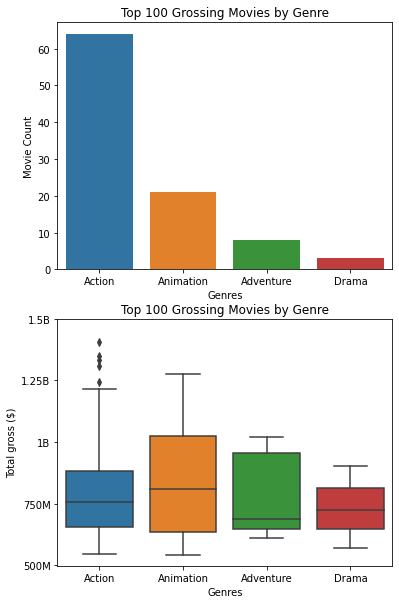

In [207]:
#Organize movies by top 100 by total gross, use genres as colors
movies = no_index.groupby(['title','genres_cleaned'])['total_gross'].sum().sort_values(ascending=False).reset_index().head(100)
movies_genre = movies.loc[(movies['genres_cleaned'] == 'Action')|(movies['genres_cleaned'] == 'Animation')|(movies['genres_cleaned'] == 'Adventure')|(movies['genres_cleaned'] == 'Drama')]
totals = movies_genre.groupby('genres_cleaned').count().sort_values(by = 'total_gross',ascending=False).reset_index()
totals

fig, axes = plt.subplots(2,1, figsize = (6,10))

#Barplot
sns.barplot(ax=axes[0],data=totals,x='genres_cleaned',y='total_gross').set(xlabel ='Genres', ylabel= 'Movie Count', title = 'Top 100 Grossing Movies by Genre')

#Swarmplot
sns.boxplot(ax=axes[1],data=movies_genre,x='genres_cleaned',y='total_gross').set(xlabel ='Genres', ylabel= 'Total gross ($)', title = 'Top 100 Grossing Movies by Genre')

#list from value_counts by genre
plt.yticks([500000000,750000000,1000000000,1250000000,1500000000],['500M', '750M','1B', '1.25B','1.5B']);


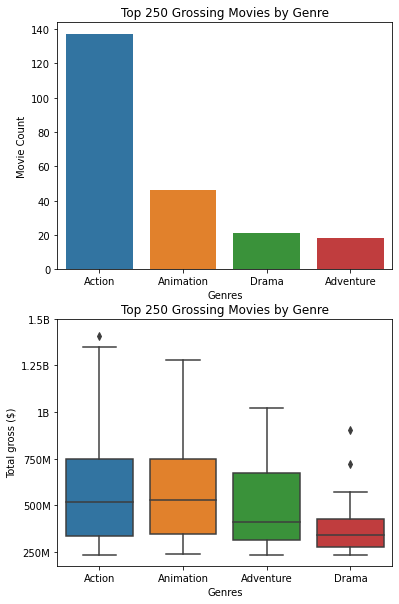

In [208]:
#Organize top 250 movies by title, genres and total gross
top250 = no_index.groupby(['title','genres_cleaned'])['total_gross'].sum().sort_values(ascending=False).reset_index().head(250)
top250_genres = top250.loc[(top250['genres_cleaned'] == 'Action')|(top250['genres_cleaned'] == 'Animation')|(top250['genres_cleaned'] == 'Adventure')|(top250['genres_cleaned'] == 'Drama')]
totals = top250_genres.groupby('genres_cleaned').count().sort_values(by='total_gross',ascending=False).reset_index()
totals
fig, axes = plt.subplots(2,1, figsize = (6,10))

#Barplot
sns.barplot(ax = axes[0],data=totals,x='genres_cleaned',y='total_gross').set(xlabel ='Genres', ylabel= 'Movie Count', title = 'Top 250 Grossing Movies by Genre')
#Swarmplot
sns.boxplot(ax = axes[1],data=top250_genres,x='genres_cleaned',y='total_gross').set(xlabel ='Genres', ylabel= 'Total gross ($)', title = 'Top 250 Grossing Movies by Genre')
#list of value_counts by genre
plt.yticks([250000000,500000000,750000000,1000000000,1250000000,1500000000],['250M','500M', '750M','1B', '1.25B','1.5B']);


# Top 10 Studios by Total Gross
I wanted to see who the top 10 studios were by total gross, to then delve deeper into if action or animation are leading to their success.

In [189]:
#Top 10 Studios by gross
a = px.bar(no_index.groupby('studio')['total_gross'].sum().sort_values(ascending=False).reset_index().head(10),x='studio',y='total_gross',title = 'Top 10 Studios by Total Gross',labels = {'studio':'Studio','total_gross':'Total Gross ($)'},color = 'studio');
a

# Top 5 Studios Gross Proportions by Genre
I took the top 5 studios and separated the money they make from action, animation and other genre movies. From there I separated it into just action and other genres to demonstrate that in order to be a successful studio, you need 50% of your gross earnings coming from action movies.

In [199]:
#Separate studios into top 5
new_no_index = no_index.groupby(['studio','genres_cleaned']).sum().sort_values(by='total_gross',ascending=False).reset_index()
for i,x in enumerate(new_no_index['studio']): 
    if x == 'BV': 
        new_no_index.loc[i,'studio'] = 'BV'
    elif x == 'Fox': 
        new_no_index.loc[i,'studio'] = 'Fox'
    elif x == 'Uni.':
        new_no_index.loc[i,'studio'] = 'Uni.'
    elif x == 'Par.':
        new_no_index.loc[i,'studio'] = 'Par.'
    elif x == 'WB':
        new_no_index.loc[i,'studio'] = 'WB'
    else:
        new_no_index.loc[i,'studio'] = 'other'

#get rid of all studios we don't want to analyze
new_no_index_deleted = new_no_index.loc[new_no_index['studio'] != 'other']

In [200]:
new_no_index_deleted

#Bar plot showing all genres spread
m = px.bar(new_no_index_deleted,x='studio',y='total_gross',color='genres_cleaned',title='Total Gross by Studio Separated by Action, Animation and Other Genres',labels ={'total_gross':'Total Gross','studio':'Studio','genres_cleaned':'Genres'});
m

# Top 5 Studio Gross by Action Movies

In [201]:
for i,x in enumerate(new_no_index_deleted['genres_cleaned']): 
    if x == 'Action': 
        new_no_index_deleted.loc[i,'genres_cleaned'] = 'Action'
    else: 
        new_no_index_deleted.loc[i,'genres_cleaned'] = 'Total'

new_no_index_deleted2 = new_no_index_deleted.loc[(new_no_index_deleted['genres_cleaned'] == 'Action')|(new_no_index_deleted['genres_cleaned'] == 'Total')]

r = px.bar(new_no_index_deleted2,x='studio',y='total_gross',color='genres_cleaned',title='Total Gross by Studio Separated by Action and Other Genres',labels ={'total_gross':'Total Gross','studio':'Studio','genres_cleaned':'Genres'})
r

/Users/evan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-201-1c39ad411238>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Runtime Action V Animation Movies
I wanted to see if movie runtimes had any influence on their gross earnings. There is a clear trend in that animation movies tend to be approximately 90 minutes and action movies are approximately 115 minutes.

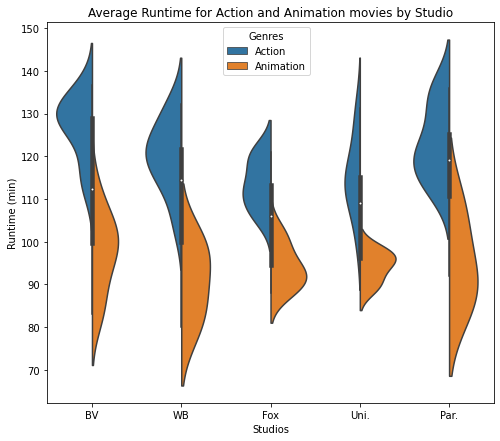

In [171]:
#compare runtime to total gross for action and animation movies
runtime = no_index.groupby(['genres_cleaned','year','studio'])[['runtime_minutes','total_gross']].mean().sort_values(by='total_gross',ascending=False)
runtime.reset_index(inplace=True)

#trying to do top 5 studios only
bv = runtime.loc[(runtime['studio'] == 'BV')&(runtime['genres_cleaned'] == 'Action') | (runtime['studio'] == 'BV') & (runtime['genres_cleaned']== 'Animation')]
wb = runtime.loc[(runtime['studio'] == 'WB')&(runtime['genres_cleaned'] == 'Action') | (runtime['studio'] == 'WB') & (runtime['genres_cleaned']== 'Animation')]
fox = runtime.loc[(runtime['studio'] == 'Fox')&(runtime['genres_cleaned'] == 'Action') | (runtime['studio'] == 'Fox') & (runtime['genres_cleaned']== 'Animation')]
uni = runtime.loc[(runtime['studio'] == 'Uni.')&(runtime['genres_cleaned'] == 'Action') | (runtime['studio'] == 'Uni.') & (runtime['genres_cleaned']== 'Animation')]
par = runtime.loc[(runtime['studio'] == 'Par.')&(runtime['genres_cleaned'] == 'Action') | (runtime['studio'] == 'Par.') & (runtime['genres_cleaned']== 'Animation')]
studio_runtime = pd.concat([bv,wb,fox,uni,par], axis = 0)

#studio_runtime


fig,axes = plt.subplots(1,1,figsize=(8,7))
#violin plots
sns.violinplot(data=studio_runtime, x="studio", y="runtime_minutes", hue="genres_cleaned",split=True).set(xlabel='Studios',ylabel='Runtime (min)',title='Average Runtime for Action and Animation movies by Studio')
plt.legend(title='Genres',bbox_to_anchor=(0.6,1));


I plotted the same graph with the median lines to demonstrate the fact that the top 5 studios tend to make their action movies longer than the industry as a whole.

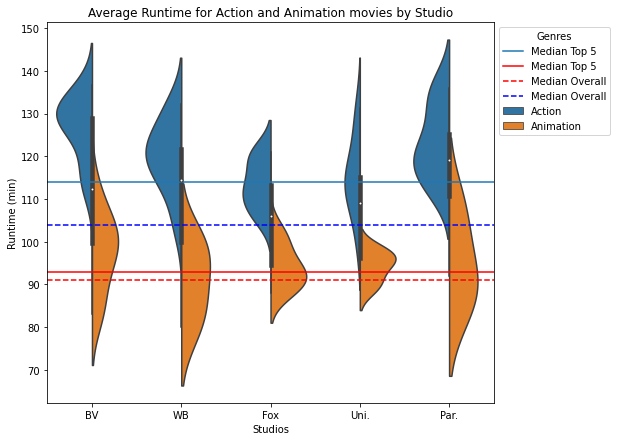

In [172]:
#With median times by top 5 studio and genre overall
fig, ax = plt.subplots(figsize=(8,7))
sns.violinplot(data=studio_runtime, x="studio", y="runtime_minutes", hue="genres_cleaned",split=True).set(xlabel='Studios',ylabel='Runtime (min)',title='Average Runtime for Action and Animation movies by Studio')
plt.legend(title='Genres')

#median lines
plt.axhline(y = 114, linestyle = '-',label='Median Top 5')
plt.axhline(y = 93, color = 'r',linestyle = '-',label = 'Median Top 5')
plt.axhline(y = 91, color = 'r', linestyle = '--',label = 'Median Overall')
plt.axhline(y = 104, color = 'b', linestyle = '--',label = 'Median Overall')
plt.legend(title='Genres',bbox_to_anchor =(1, 1));

# Conclusions

There are three key recommendations that I would make to Microsoft for their movie studios.
1. Ensure that action and animation movies are the primary focus of the studio.
2. In order to be a successful studio, at least 50% of the gross earnings need to come from action movies.
3. Animation and action movies tend to be around 90 and 110 minutes, although the top grossing action movies are significantly longer than the median.


# Next Steps

With further time and data I look further into:
1. Directors, writers and actors and how much their movies gross.
2. Investigate production budget by genre.
3. Consider how the movie landscape is changing with streaming services.